In [259]:
import pandas as pd
#read tweets

name_tweets = "results.json"

with open(name_tweets, "r") as file:
    tweets_df = pd.read_json(file, orient='index')
print(len(tweets_df))
print(tweets_df.columns)

2348
Index(['predicted changes', 'text', 'timestamp', 'tweet', 'value change'], dtype='object')


In [260]:
tweets_df.sort_index(inplace=True)
tweets_df = tweets_df.reset_index(drop=True)
print(tweets_df["timestamp"][0])
print(len(tweets_df))
print(tweets_df["timestamp"][2347])

2015-06-14 21:18:23
2348
2018-09-25 16:45:36


In [261]:
#tweets=tweets_df.loc[tweets_df["timestamp"] < datetime.strptime('11/08/2016', '%m/%d/%Y')]
#print(tweets["timestamp"].values[0])
#print(tweets)
tweets=tweets_df

In [262]:
#tweets_dfx['difference'] = np.where(tweets["value change"]==tweets["predicted changes"], 1, 0)
tweets_dfxx=tweets.loc[tweets["value change"]==tweets["predicted changes"]]
print(len(tweets_dfxx))

1039


In [263]:
tweets_dfx=tweets.loc[tweets["value change"]!=tweets["predicted changes"]]
print(len(tweets_dfx))

#tweets_df1=tweets_dfx.loc[tweets_dfx["difference"]==0]

tweets_dfx=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGPOS') | (tweets_dfx["value change"].values=='MEDPOS') |
                         (tweets_dfx["value change"].values=='SMAPOS')]
tweets_df1=tweets_dfx.loc[(tweets_dfx["predicted changes"].values=='BIGPOS') | (tweets_dfx["predicted changes"].values=='MEDPOS') |
                         (tweets_dfx["predicted changes"].values=='SMAPOS')]
#tweets_df1.head()

tweets_dfx=tweets.loc[tweets["value change"]!=tweets["predicted changes"]]
print(len(tweets_dfx))

tweets_dfx=tweets_dfx.loc[(tweets_dfx["value change"].values=='BIGNEG') | (tweets_dfx["value change"].values=='MEDNEG') |
                         (tweets_dfx["value change"].values=='SMANEG')]
tweets_df2=tweets_dfx.loc[(tweets_dfx["predicted changes"].values=='BIGNEG') | (tweets_dfx["predicted changes"].values=='MEDNEG') |
                         (tweets_dfx["predicted changes"].values=='SMANEG')]

#classified2.head()
#print(len(tweets_dfx))

1309
1309


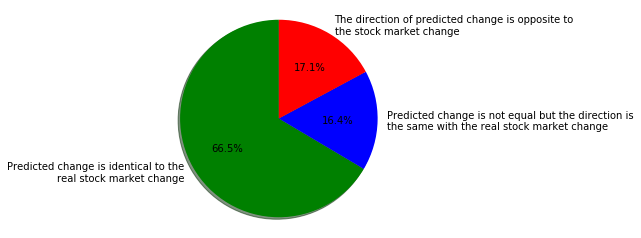

In [264]:
#modifying data
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
text1=textwrap.fill('Predicted change is identical to the real stock market change', width=40)
text2=textwrap.fill('Predicted change is not equal but the direction is the same with the real stock market change', width=50)
text3=textwrap.fill('The direction of predicted change is opposite to the stock market change', width=50)
labels = text1, text2, text3
colors  = ("green", "blue", "red")
sizes = [len(tweets_dfxx),len(tweets_df1), len(tweets_df2)]
#print(len(tweets_dfxx),len(tweets_df1), len(tweets_df2))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [125]:
import json
import pandas as pd
from pandas.io.json import json_normalize

with open('DJI-20years-daily-close.json', 'r') as myfile:
    data1=myfile.read()

obj = json.loads(data1)
orig_stock_df = pd.DataFrame.from_dict(obj, orient='index')

print(orig_stock_df["4. close"].index[0])
print(orig_stock_df.describe())

2000-01-03
           4. close
count   4725.000000
mean   13260.587012
std     4320.329855
min     6547.049800
25%    10368.610400
50%    11575.540000
75%    16072.540000
max    26828.390600


In [265]:
#tweets_df.sort_values("timestamp", ascending=False)
tweets_df.sort_index(inplace=True)
tweets_df = tweets_df.reset_index(drop=True)
print(tweets_df["timestamp"][0])
print(len(tweets_df))
print(tweets_df["timestamp"][2347])

2015-06-14 21:18:23
2348
2018-09-25 16:45:36


In [128]:
def store_time_stats(t):
    if t.year not in time_bins:
        time_bins[t.year] = 1
    else: time_bins[t.year] += 1
       
    ym = str(t.year) + "-" + str(t.month)
    if ym not in time_bins:
        time_bins[ym] = 1
    else: time_bins[ym] += 1

In [187]:
#combine the data
from datetime import datetime
from datetime import timedelta

classified = pd.DataFrame(columns=["date", "timestamp", "text", "tweet", "predicted changes", "orig changes", "orig stock", ], index=range(tweets_df.shape[0]))
print("classified shape:", classified.shape, "\ntweets_df shape:", tweets_df.shape)
time_bins = {}
latest_date_ind = 0

for i, t in enumerate(tweets_df["timestamp"]):    
    #count how many tweet per year and month
    store_time_stats(t)
    #fetch the change of the tweet's day and original stock rate 
    date_fix = t.date() + timedelta(days=1)
    date=str(date_fix)
    if not orig_stock_df[orig_stock_df.index == date].empty and t.date() > datetime.strptime('11/08/2016', '%m/%d/%Y').date():
        orig_stock=orig_stock_df.loc[date, "4. close"]

        #save to datastruct
        classified["date"][i] = date     
        classified["timestamp"][i] = t
        classified["text"][i] = tweets_df["text"][i]
        classified["tweet"][i] = tweets_df["tweet"][i]
        classified["predicted changes"][i] = tweets_df["predicted changes"][i]  
        classified["orig changes"][i] = tweets_df["value change"][i]        
        classified["orig stock"][i] = orig_stock
        


classified shape: (2348, 7) 
tweets_df shape: (2348, 5)


In [191]:
classified=classified[classified["text"].notnull()]
print(len(classified))

2348


In [146]:
#descriptive statistics
import numpy as np
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

#aggregate stock data for predicted and original classes
grouped_data = classified.groupby(['orig changes', 'predicted changes'])
grouped_data['orig stock'].describe().unstack()


count                                    unique         \
predicted changes BIGNEG BIGPOS MEDNEG MEDPOS SMANEG SMAPOS BIGNEG BIGPOS   
orig changes                                                                
BIGNEG               5.0    4.0   11.0    6.0    NaN    3.0    4.0    3.0   
BIGPOS               7.0    7.0    7.0    6.0    2.0    5.0    7.0    4.0   
MEDNEG               6.0    6.0    7.0    3.0    4.0    3.0    4.0    6.0   
MEDPOS               6.0    4.0    8.0   18.0    9.0    6.0    6.0    2.0   
SMANEG               3.0    3.0    3.0    4.0    2.0    NaN    3.0    2.0   
SMAPOS               NaN    2.0    7.0    2.0    NaN    3.0    NaN    2.0   

                                 ...           top                          \
predicted changes MEDNEG MEDPOS  ...        MEDNEG      MEDPOS      SMANEG   
orig changes                     ...                                         
BIGNEG              10.0    5.0  ...    25064.5000  25986.9199         NaN   
BIGPOS               6.0    5.0  ...    25414.0996  25558.7305  25414.0996   
MEDNEG               7.0    3.0  ...    26492.2109  25583.7500  26062.1191   
MEDPOS               8.0   14.0  ...    24271.4102  24216.0508  24216.0508   
SMANEG               2.0    3.0  ...    25058.1191  25964.8203  25964.8203   
SMAPOS               4.0    1.0  ...    25995.8691  25995.8691         NaN   

                                freq                                     
predicted changes      SMAPOS BIGNEG BIGPOS MEDNEG MEDPOS SMANEG SMAPOS  
orig changes                                                             
BIGNEG             25986.9199    2.0    2.0    2.0    2.0    NaN    1.0  
BIGPOS             24919.6602    1.0    3.0    2.0    2.0    1.0    1.0  
MEDNEG             26492.2109    3.0    1.0    1.0    1.0    1.0    2.0  
MEDPOS             24580.8906    1.0    3.0    1.0    3.0    2.0    2.0  
SMANEG                    NaN    1.0    2.0    2.0    2.0    1.0    NaN  
SMAPOS             25998.9199    NaN    1.0    4.0    2.0    NaN    2.0  

[6 rows x 24 columns]

In [147]:
#summary statistics for classes -not working
#grouped_data['orig stock'].apply(mode, axis=None).reset_index()
#descr = grouped_data['orig stock'].aggregate([np.median, np.std, np.mean]).reset_index()
#descr

#summary statistics for continuous orig stock
descr = classified['orig stock'].aggregate([np.median, np.std, np.mean]).reset_index()
descr

,index,orig stock
0,median,25316.529300
1,std,671.688250
2,mean,25355.138658


In [149]:
#plotting data


#distribution between variables
#import seaborn as sns
#sns.boxplot(x="predicted changes", y="orig stock", data=classified)

# pairwise correlation: Strongly correlated predictors, phenomenon referred to as multicollinearity, 
#will cause coefficient estimates to be less reliable

In [150]:
#Chi-Square test of independency for two categorical values
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="p-value " + str(self.p) + " for {0} is smaller than alpha " + str(alpha) + " so correlation exists".format(colX)
        else:
            result="{0} is NOT an important predictor.".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


#Initialize ChiSquare Class
cT = ChiSquare(classified)

#Feature Selection
cT.TestIndependence(colX="orig changes",colY="predicted changes")

p-value 0.0 for {0} is smaller than alpha 0.05 so correlation exists


In [166]:
#read dataframe into .txt file for animated plot and drop duplicates
import numpy as np

classified.drop_duplicates(["date"],inplace=True)
print(classified.head())

            date            timestamp  \
0            NaN                  NaN   
2109  2018-05-22  2018-05-21 11:27:42   
2111  2018-05-24  2018-05-23 01:13:46   
2113  2018-05-25  2018-05-24 12:34:29   
2118  2018-05-29  2018-05-28 12:58:07   

                                                   text  \
0                                                   NaN   
2109  china has agreed to buy massive amounts of add...   
2111  if the person placed very early into my campai...   
2113  not surprisingly the great men women of the fb...   
2118  happy memorial day those who died for our grea...   

                                                  tweet predicted changes  \
0                                                   NaN               NaN   
2109  China has agreed to buy massive amounts of ADD...            BIGPOS   
2111  If the person placed very early into my campai...            SMAPOS   
2113  Not surprisingly, the GREAT Men &amp; Women of...            BIGNEG   
2118  Happy M

In [169]:
#taking the text column if the predicted value is equal to value change
classified1['text'] = np.where(classified["difference"]==1, classified['text'], "")
print(classified1.head())

ValueError: Length of values does not match length of index

In [56]:
#Business day offset
import pandas as pd
import sys
from pandas.tseries.offsets import *

isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(classified['date']).map(isBusinessDay)
classified1[match_series]

C:\Users\Suvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,timestamp,text,tweet,predicted changes,orig changes,orig stock,difference
2109,2018-05-22,2018-05-21 11:27:42,china has agreed to buy massive amounts of add...,,BIGPOS,BIGNEG,24834.4,0
2111,2018-05-24,2018-05-23 01:13:46,if the person placed very early into my campai...,,SMAPOS,MEDNEG,24811.8,0
2113,2018-05-25,2018-05-24 12:34:29,not surprisingly the great men women of the fb...,,BIGNEG,MEDNEG,24753.1,0
2118,2018-05-29,2018-05-28 12:58:07,happy memorial day those who died for our grea...,,MEDNEG,BIGNEG,24361.4,0
2120,2018-05-31,2018-05-30 17:09:38,today i am proud to keep another promise to th...,,MEDNEG,BIGNEG,24415.8,0
2125,2018-06-05,2018-06-04 12:18:07,we had repeal replace done and the saving to o...,,MEDPOS,SMANEG,24800,0
2126,2018-06-06,2018-06-05 13:02:33,in high tax high crime california be sure to g...,"In High Tax, High Crime California, be sure to...",BIGPOS,BIGPOS,25146.4,1
2128,2018-06-07,2018-06-06 00:37:50,wow strzok page the incompetent corrupt fbi lo...,,BIGNEG,MEDPOS,25241.4,0
2132,2018-06-08,2018-06-07 11:57:03,isn t it ironic getting ready to go to the g i...,,MEDNEG,MEDPOS,25316.5,0
2138,2018-06-14,2018-06-13 09:40:03,realize the economy is the best it s ever been...,,BIGPOS,SMANEG,25175.3,0


,date,timestamp,text,tweet,predicted changes,orig changes,orig stock,difference
count,75,75,75,75,75,75,75.0000,75
unique,75,75,74,16,6,6,75.0000,2
top,2018-07-18,2018-09-19 04:04:32,https,,MEDNEG,MEDPOS,24700.4492,0
freq,1,1,2,60,21,21,1.0000,60


In [58]:
del classified1["date"]
del classified1["tweet"]
del classified1["orig changes"]
del classified1["difference"]
np.savetxt("animation.txt", classified1.values, encoding='utf-8', fmt='%s', delimiter=',')